나중에 이미지에서 한글 깨지지 않으려면 아래의 코드 실행 후 런타임을 다시 연결해야 함.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

데이터 분류기   
데이터 이해

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/cmm_data.csv', skiprows=0, encoding='cp949')
df.head()

,파일명,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
0,240307_일상검사_주_초_2-6-1,0.018786,0.009,0.011,-0.041,-0.008,0.018786,0.018786,0.092,0.009,...,0.004,-0.104,0.046,0.051,0.053,-0.005,-0.034,0.123,-0.013,0
1,240306_일상검사_주_초_1-4-1,0.034946,-0.004,0.003,-0.008,-0.003,0.034946,0.034946,0.099,0.009,...,0.002,-0.123,0.039,0.085,0.035,-0.027,0.082,0.239,0.008,0
2,240304_일상검사_야_중_1-3-1_OK,0.013679,0.001,0.005,0.000,0.002,0.013679,0.013679,0.023,0.002,...,0.003,-0.367,0.045,0.068,0.057,0.002,-0.033,0.281,0.002,1
3,240307_일상검사_야_초_1-4-1_NG,0.021589,-0.001,0.000,-0.005,-0.002,0.021589,0.021589,0.041,0.004,...,0.002,-0.229,0.042,0.056,0.046,-0.006,0.203,0.188,-0.001,0
4,240307_일상검사_야_초_1-3-1_NG,0.009125,0.000,0.002,0.003,0.002,0.009125,0.009125,0.015,0.001,...,0.002,-0.155,0.030,0.044,0.053,0.032,-0.006,0.132,-0.004,0


In [ ]:
# 데이터의 수 (레코드수, 특징수)
df.shape

(129, 67)

In [ ]:
df.dtypes # 데이터 유형

파일명                                     object
평면1,평면도                                float64
원1(I) <상>,D                            float64
원2(I) <중>,D                            float64
원3(I) <하>,D                            float64
                                        ...   
점30 <- 점18의 되부름 <소재원점>,Y               float64
직선25 <- 직선18의 되부름,X/Y                  float64
직선26 <- 직선16의 되부름,X/Y                  float64
거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
품질상태                                     int64
Length: 67, dtype: object

In [ ]:
# 기본적인 통계
df.describe()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.025530,0.001132,0.006078,-0.000047,0.002388,0.025530,0.025530,0.060163,0.005612,0.083287,...,0.003209,-0.158124,0.042000,0.066597,0.052101,0.022612,-0.000349,0.219853,0.008798,0.434109
std,0.012690,0.007849,0.006793,0.008840,0.007091,0.012690,0.012690,0.035655,0.003298,0.250659,...,0.001327,0.089556,0.008517,0.013023,0.010021,0.025920,0.113232,0.172062,0.011765,0.497572
min,-0.015929,-0.021000,-0.017000,-0.041000,-0.015000,-0.015929,-0.015929,-0.068000,-0.006000,-2.111000,...,0.000000,-0.492000,0.012000,0.039000,0.017000,-0.070000,-0.309000,-0.258000,-0.016000,0.000000
25%,0.018125,-0.004000,0.002000,-0.005000,-0.002000,0.018125,0.018125,0.039000,0.004000,0.030000,...,0.003000,-0.190000,0.038000,0.057000,0.047000,0.006000,-0.068000,0.134000,0.001000,0.000000
50%,0.024804,0.001000,0.005000,0.001000,0.002000,0.024804,0.024804,0.057000,0.005000,0.125000,...,0.003000,-0.165000,0.042000,0.067000,0.052000,0.025000,0.007000,0.228000,0.008000,0.000000
75%,0.032518,0.006000,0.012000,0.005000,0.007000,0.032518,0.032518,0.079000,0.007000,0.180000,...,0.004000,-0.128000,0.046000,0.076000,0.056000,0.039000,0.071000,0.298000,0.014000,1.000000
max,0.078179,0.020000,0.021000,0.021000,0.019000,0.078179,0.078179,0.216000,0.020000,0.549000,...,0.009000,0.426000,0.063000,0.100000,0.107000,0.081000,0.343000,1.063000,0.047000,1.000000


데이터 전처리

In [ ]:
# 문자열 카테고리값으로 변환
categorical_columns = df.select_dtypes(include=['float64']).columns
df[categorical_columns] = df[categorical_columns].astype('category')

df.dtypes

파일명                                      object
평면1,평면도                                category
원1(I) <상>,D                            category
원2(I) <중>,D                            category
원3(I) <하>,D                            category
                                         ...   
점30 <- 점18의 되부름 <소재원점>,Y               category
직선25 <- 직선18의 되부름,X/Y                  category
직선26 <- 직선16의 되부름,X/Y                  category
거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    category
품질상태                                      int64
Length: 67, dtype: object

In [ ]:
# 모든 카테고리값을 출력
category_values = {col: df[col].cat.categories for col in categorical_columns}

# 특정 카테고리값을 출력
df['평면1,평면도'].cat.categories

Index([-0.0159285714285714, -0.0143749999999999, -0.0023571428571428,
        0.0075357142857142,  0.0077857142857142,  0.0085535714285714,
                  0.008625,  0.0091249999999999,  0.0094464285714285,
        0.0095178571428571,
       ...
        0.0396964285714285,  0.0405714285714285,  0.0447321428571428,
        0.0454464285714285,  0.0482857142857142,  0.0487142857142857,
        0.0517321428571428,  0.0545892857142857,  0.0676785714285714,
        0.0781785714285714],
      dtype='float64', length=123)

In [ ]:
# 카테고리 데이터에 대한 표현 통계
df[categorical_columns].describe()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,X","점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS"
count,129.000000,129.000,129.000,129.000,129.000,129.000000,129.000000,129.000,129.000,129.000,...,129.000,129.000,129.000,129.000,129.000,129.000,129.000,129.000,129.000,129.000
unique,123.000000,33.000,30.000,34.000,30.000,123.000000,123.000000,80.000,16.000,106.000,...,42.000,9.000,87.000,34.000,49.000,36.000,72.000,108.000,107.000,42.000
top,0.013679,0.001,0.012,0.001,0.002,0.013679,0.013679,0.039,0.004,0.177,...,0.029,0.003,-0.175,0.044,0.065,0.052,0.039,-0.017,0.239,0.003
freq,2.000000,14.000,10.000,9.000,16.000,2.000000,2.000000,4.000,19.000,4.000,...,11.000,52.000,4.000,13.000,7.000,11.000,6.000,4.000,3.000,7.000


데이터 탐색 (상관관계 분석)

In [ ]:
# 카테고리 값을 숫자로 변환
df_copy = df.copy()
for col in categorical_columns:
    df_copy[col] = df_copy[col].cat.codes

In [ ]:
df_copy = df_copy.select_dtypes(include=['number'])
df_copy.corr()

,"평면1,평면도","원1(I) <상>,D","원2(I) <중>,D","원3(I) <하>,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,D","원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도","원통1(I) <- 원1, 원2, 원3의 측정점 병합,직각도","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,X","점2 <- 점1의 되부름 <열전 관리치수(Spec : 116.6±0.1)>,Y","각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang",...,"점28 <- 점27의 되부름 <소재 원점>,Y","각도2 <- 각도[XYPLAN]:직선23와 직선24,Ang","점29 <- 점13의 되부름 <소재원점>,X","점29 <- 점13의 되부름 <소재원점>,Y","점30 <- 점18의 되부름 <소재원점>,X","점30 <- 점18의 되부름 <소재원점>,Y","직선25 <- 직선18의 되부름,X/Y","직선26 <- 직선16의 되부름,X/Y","거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",품질상태
"평면1,평면도",1.000000,-0.088912,-0.005514,-0.043053,-0.040916,1.000000,1.000000,0.507392,0.508883,0.261132,...,-0.023336,0.202385,-0.295460,0.294458,-0.095921,0.067397,0.299813,0.651454,-0.185124,-0.152416
"원1(I) <상>,D",-0.088912,1.000000,0.744979,0.847512,0.916844,-0.088912,-0.088912,0.056040,0.063594,0.116283,...,-0.157408,-0.169375,0.050614,0.015268,0.018969,-0.083888,-0.072615,-0.215126,-0.010984,0.516561
"원2(I) <중>,D",-0.005514,0.744979,1.000000,0.753517,0.871251,-0.005514,-0.005514,0.245630,0.248169,0.229044,...,-0.056228,0.051479,-0.011880,0.036665,0.041082,-0.101109,-0.132021,-0.166636,-0.124620,0.331471
"원3(I) <하>,D",-0.043053,0.847512,0.753517,1.000000,0.956722,-0.043053,-0.043053,0.027068,0.043034,0.150606,...,-0.124500,-0.098023,0.010380,0.022577,0.097285,0.022483,-0.086047,-0.123232,-0.011816,0.485863
"원통1(I) <- 원1, 원2, 원3의 측정점 병합,D",-0.040916,0.916844,0.871251,0.956722,1.000000,-0.040916,-0.040916,0.099909,0.111529,0.185022,...,-0.133040,-0.091206,0.008391,0.037209,0.056697,-0.041023,-0.096670,-0.166904,-0.037245,0.492930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"점30 <- 점18의 되부름 <소재원점>,Y",0.067397,-0.083888,-0.101109,0.022483,-0.041023,0.067397,0.067397,-0.283534,-0.278600,0.173765,...,0.178012,0.400052,-0.246804,0.085785,0.118408,1.000000,-0.183842,0.074412,0.265355,0.154987
"직선25 <- 직선18의 되부름,X/Y",0.299813,-0.072615,-0.132021,-0.086047,-0.096670,0.299813,0.299813,-0.119884,-0.117904,-0.087822,...,-0.102114,-0.073500,0.135801,-0.119463,-0.056601,-0.183842,1.000000,-0.030441,-0.029763,-0.145222
"직선26 <- 직선16의 되부름,X/Y",0.651454,-0.215126,-0.166636,-0.123232,-0.166904,0.651454,0.651454,0.272849,0.255015,-0.034397,...,-0.052636,0.031479,-0.516875,0.148744,-0.050192,0.074412,-0.030441,1.000000,-0.313617,-0.144009
"거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS",-0.185124,-0.010984,-0.124620,-0.011816,-0.037245,-0.185124,-0.185124,-0.352480,-0.335927,0.075576,...,0.165082,0.187734,0.276849,0.528911,0.122414,0.265355,-0.029763,-0.313617,1.000000,-0.056530


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  # 나눔 바른 고딕 폰트를 사용하도록 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지지 않도록 설정

# # Calculate the correlation matrix
# correlation_matrix = df_copy.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Matrix of the Data')
# plt.show()



In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic')  # 나눔 바른 고딕 폰트를 사용하도록 설정
# plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지지 않도록 설정

# # 표시할 행과 열의 인덱스 설정
# columns_to_display = ['평면1,평면도', '원1(I) <상>,D','원통1(I) <- 원1, 원2, 원3의 측정점 병합,원통도','각도1 <- 각도[XYPLAN]:직선2와 직선3,Ang','점4 <- 직선6와 직선5의 교차점 <소재>,X','직선7 <23.1°>,Y/X','거리1 <- XAXIS[PT]:점9와 점10 <상>,DS']  # 예시로 표시할 항목들을 지정합니다.

# # 필요한 열만 있는 DataFrame 생성
# df_display = df_copy[columns_to_display]

# # Calculate the correlation matrix
# correlation_matrix = df_display.corr()

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Matrix of the Data')
# plt.show()


랜덤 포레스트 분류기
- 일부 컬럼만 사용해서 분류기 만들어보기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Prepare the data
X = df_copy.drop(['품질상태'], axis=1)  # Features
y = df_copy['품질상태']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy


0.7307692307692307

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.64      0.82      0.72        11

    accuracy                           0.73        26
   macro avg       0.74      0.74      0.73        26
weighted avg       0.75      0.73      0.73        26



결과 예측

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


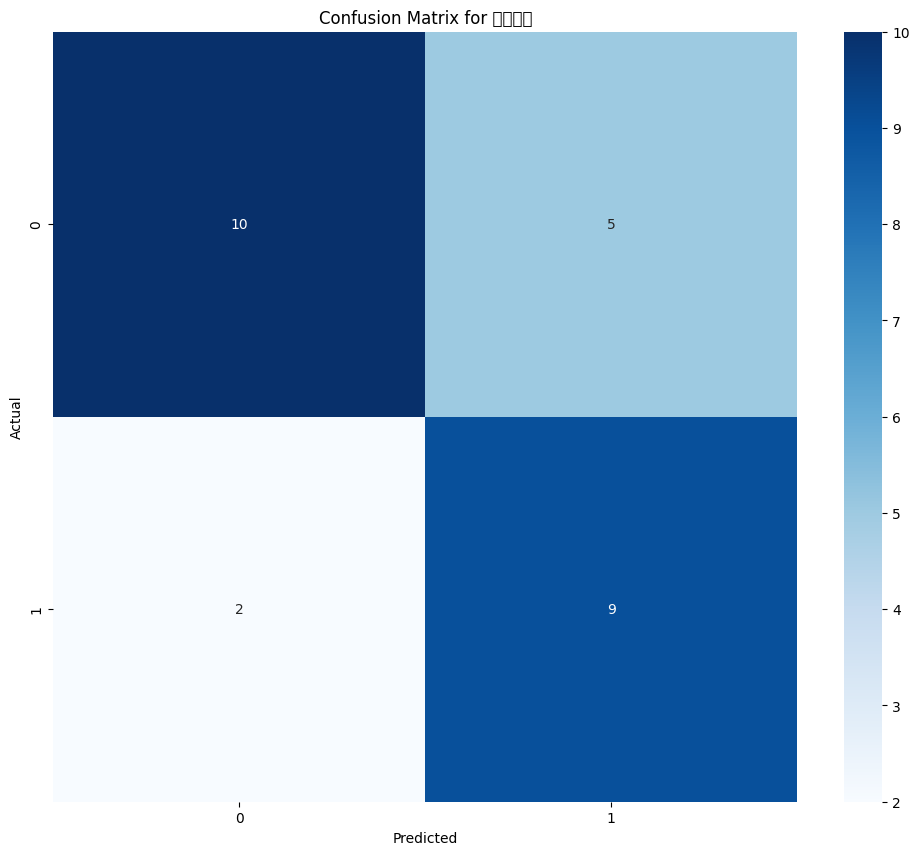

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 예측값과 실제값을 기반으로 혼동 행렬 생성
cm_rel_blk = confusion_matrix(y_test, y_pred)

# 고유한 레이블 가져오기
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(cm_rel_blk, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix for 품질상태')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Feature Importance & Permutation Importance & 개별 트리 출력


Top 5 Feature Importance:
Feature 원3(I) <하>,D: 0.06378164059009443
Feature 원통1(I) <- 원1, 원2, 원3의 측정점 병합,D: 0.06090282523183224
Feature 원1(I) <상>,D: 0.05812597359732963
Feature 원6(I) <하부>,D: 0.035987779338898164
Feature 원5(I) <상부>,D: 0.032195831295322525

Bottom 5 Feature Importance:
Feature 점28 <- 점27의 되부름 <소재 원점>,Y: 0.002093010941864725
Feature 직선4 <27° 소재>,Y/X: 0.003310280184285453
Feature 직선8 <6°>,Y/X: 0.004255595708900353
Feature 직선25 <- 직선18의 되부름,X/Y: 0.004540152455980679
Feature 원7(E) <- 원4의 되부름,Y: 0.00502390246358071

Top 5 Permutation Importance:
Feature 평면2,Z: 0.06794871794871792
Feature 점6 <- 직선9와 직선10의 교차점 <소재>,Y: 0.04871794871794868
Feature 원7(E) <- 원4의 되부름,D: 0.04743589743589739
Feature 점29 <- 점13의 되부름 <소재원점>,Y: 0.04358974358974355
Feature 점7 <- 직선10와 직선11의 교차점 <소재>,X: 0.04230769230769229

Bottom 5 Permutation Importance:
Feature 거리1 <- XAXIS[PT]:점9와 점10 <상>,DS: -0.04102564102564109
Feature 원6(I) <하부>,Y: -0.023076923076923113
Feature 직선7 <23.1°>,Y/X: -0.017948717948717993

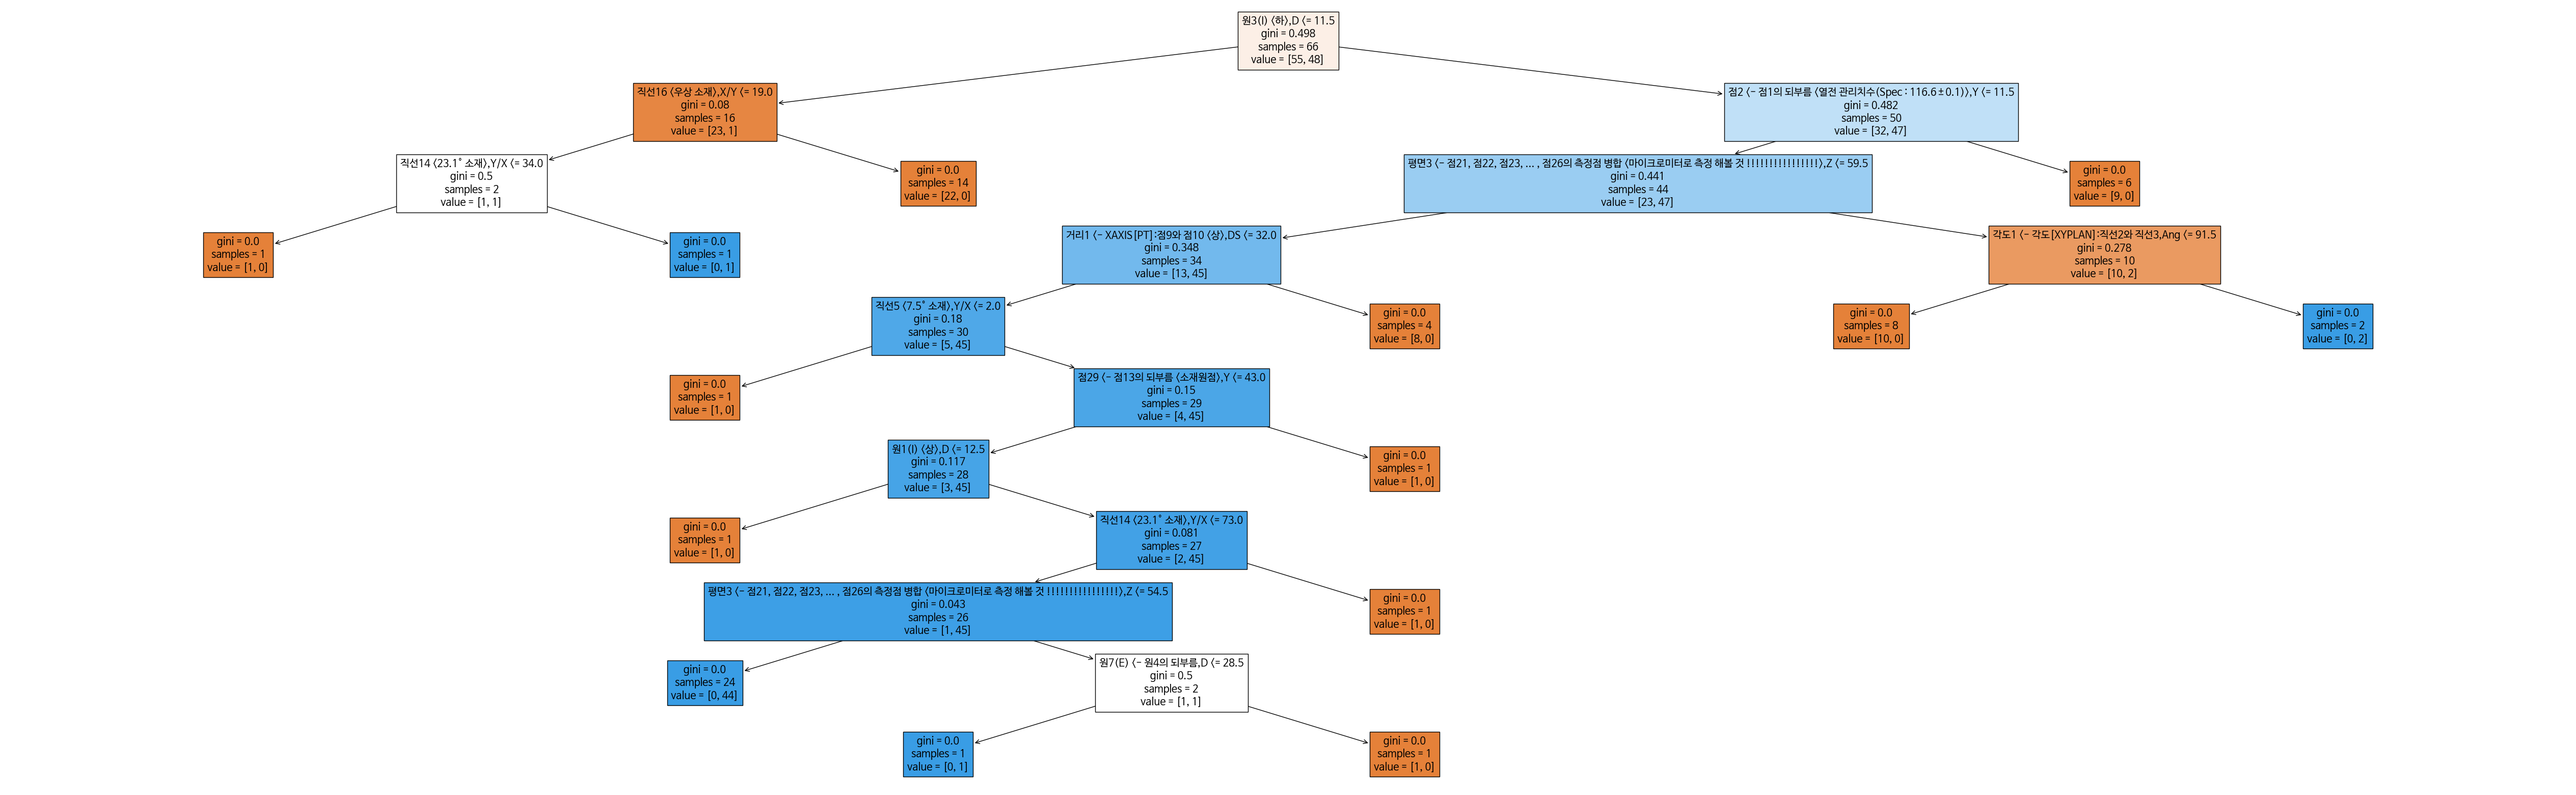

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from matplotlib import rc

# Feature Importance
print("\nTop 5 Feature Importance:")
feature_importances = rf_classifier.feature_importances_
indices = feature_importances.argsort()[-5:][::-1]  # Get indices of top 5 features
for i in indices:
    print(f"Feature {X.columns[i]}: {feature_importances[i]}")

print("\nBottom 5 Feature Importance:")
bottom_indices = feature_importances.argsort()[:5]  # Get indices of bottom 5 features
for i in bottom_indices:
    print(f"Feature {X.columns[i]}: {feature_importances[i]}")

# Permutation Importance
print("\nTop 5 Permutation Importance:")
perm_importance = permutation_importance(rf_classifier, X_test, y_test, n_repeats=30, random_state=42)
perm_indices = perm_importance.importances_mean.argsort()[-5:][::-1]  # Get indices of top 5 features
for i in perm_indices:
    print(f"Feature {X.columns[i]}: {perm_importance.importances_mean[i]}")

print("\nBottom 5 Permutation Importance:")
perm_bottom_indices = perm_importance.importances_mean.argsort()[:5]  # Get indices of bottom 5 features
for i in perm_bottom_indices:
    print(f"Feature {X.columns[i]}: {perm_importance.importances_mean[i]}")

# 랜덤 포레스트의 개별 트리 확인
print("\nIndividual Trees:")
plt.figure(figsize=(65, 20))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()
